In [63]:
%reload_ext autoreload
%autoreload 2
from chromatopy.readers import Reader1

In [64]:
path = "2023-12-08 01-20-41+01-00-01.dx_DAD1A.CSV"
reader = Reader1(path)

<Axes: xlabel='0'>

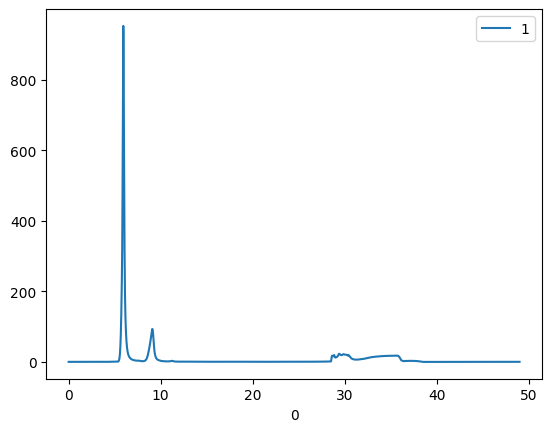

In [65]:
reader.read().plot(x=0, y=1)

In [4]:
import rainbow as rb
import os

In [5]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [49]:
path = "/Users/max/Downloads/GC_HAO 2023-07-24 21-36-55 3/001F0101.D/FID1A.ch"

x = rb.agilent.chemstation.parse_ch_fid(path).xlabels
y = rb.agilent.chemstation.parse_ch_fid(path).data

# rb.agilent.chemstation.parse_ch_fid(path).__dict__

In [40]:
# x= np.arange(0, 10, 0.1)
# y= np.sin(x)
# print(type(x))
fig = go.Figure(data=go.Scatter(x=x.flatten(), y=y.flatten(), mode="lines"))

fig.show()

In [62]:
rb.waters.read("/Users/max/Documents/training_course/lilly/20231108_EGL009_03_pos.wiff")

/Users/max/miniconda3/envs/chromatopy/lib/python3.12/site-packages/rainbow/waters/masslynx.py:234: SyntaxWarning:

invalid escape sequence '\d'



NotADirectoryError: [Errno 20] Not a directory: '/Users/max/Documents/training_course/lilly/20231108_EGL009_03_pos.wiff'

In [1]:
%reload_ext autoreload
%autoreload 2
from chromatopy.readers import ShimadzuReader

In [15]:
path = "/Users/max/Documents/training_course/martina/Output-sample 0.txt"

sections = ShimadzuReader(path=path).parse_sections()

sections

{'Header': '\nApplication Name,LCsolution\nVersion,1.25\nData File Name,C:\\LabSolutions\\Data\\aldolaze\\Martina\\aldolna adicija\\batch_21022012\\EtAc\\0.lcd\nOutput Date,12.12.2023.\nOutput Time,11:15:12\n\n',
 'File Information': '\nType,Data File\nGenerated,21.2.2012. 13:16:32\nGenerated by,Admin\nModified,21.2.2012. 13:33:38\nModified by,Admin\n\n',
 'Sample Information': '\nOperator Name,Admin\nAcquired,21.2.2012. 13:16:57\nSample Type,0:Unknown\nLevel,0\nSample Name,0\nSample ID,\nISTD Amount 1,1\nISTD Amount 2,1\nISTD Amount 3,1\nISTD Amount 4,1\nISTD Amount 5,1\nISTD Amount 6,1\nISTD Amount 7,1\nISTD Amount 8,1\nISTD Amount 9,1\nISTD Amount 10,1\nISTD Amount 11,1\nISTD Amount 12,1\nISTD Amount 13,1\nISTD Amount 14,1\nISTD Amount 15,1\nISTD Amount 16,1\nISTD Amount 17,1\nISTD Amount 18,1\nISTD Amount 19,1\nISTD Amount 20,1\nISTD Amount 21,1\nISTD Amount 22,1\nISTD Amount 23,1\nISTD Amount 24,1\nISTD Amount 25,1\nISTD Amount 26,1\nISTD Amount 27,1\nISTD Amount 28,1\nISTD Amount

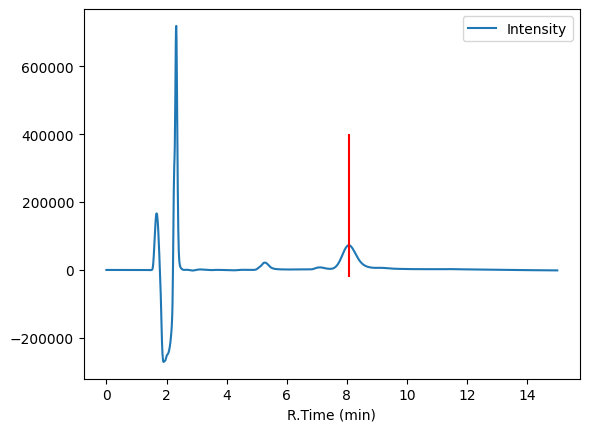

In [49]:
from io import StringIO
from tokenize import String
import matplotlib.pyplot as plt
import pandas as pd
tab = sections["LC Chromatogram(Detector A-Ch1)"]

pd.read_csv(StringIO(tab), skiprows=8).plot(x="R.Time (min)")
plt.vlines(8.06, -20000, 400000, color="red")

In [17]:
import pandas as pd


def parse_meta(self, sections: dict, section_name: str, nrows: int) -> dict:
    """Parse the metadata in a section as keys-values."""
    meta_table = pd.read_table(
        StringIO(sections[section_name]), nrows=nrows, header=None
    )
    meta = {row[0]: row[1] for _, row in meta_table.iterrows()}

    return meta


def parse_table(
    self, sections: dict, section_name: str, skiprows: int = 1
) -> Optional[pd.DataFrame]:
    """Parse the data in a section as a table."""
    table_str = sections[section_name]

    # Count number of non-empty lines
    num_lines = len([l for l in re.split("[\r\n]+", table_str) if len(l)])

    if num_lines <= 1:
        return None

    return pd.read_table(StringIO(table_str), header=1, skiprows=skiprows)


def get_compound_table(
    sections: dict, detector: str = "A"
):
    section_name = f"Compound Results(Detector {detector})"
    meta = parse_meta(sections, section_name, 1)
    table = parse_table(sections, section_name, skiprows=1)

    assert (
        table is None or int(meta["# of IDs"]) == table.shape[0]
    ), "Declared number of compounds and table size differ"

    return table

In [14]:
sections.get_compound_table(sections, detector="B")
compounds[["Name", "Conc."]].to_dict()

AttributeError: 'dict' object has no attribute 'get_compound_table'

In [9]:
with open(path, "r", encoding="ISO-8859-1") as f:
    print(f.read())

[Header]
Application Name,LCsolution
Version,1.25
Data File Name,C:\LabSolutions\Data\aldolaze\Martina\aldolna adicija\batch_21022012\EtAc\0.lcd
Output Date,12.12.2023.
Output Time,11:15:12

[File Information]
Type,Data File
Generated,21.2.2012. 13:16:32
Generated by,Admin
Modified,21.2.2012. 13:33:38
Modified by,Admin

[Sample Information]
Operator Name,Admin
Acquired,21.2.2012. 13:16:57
Sample Type,0:Unknown
Level,0
Sample Name,0
Sample ID,
ISTD Amount 1,1
ISTD Amount 2,1
ISTD Amount 3,1
ISTD Amount 4,1
ISTD Amount 5,1
ISTD Amount 6,1
ISTD Amount 7,1
ISTD Amount 8,1
ISTD Amount 9,1
ISTD Amount 10,1
ISTD Amount 11,1
ISTD Amount 12,1
ISTD Amount 13,1
ISTD Amount 14,1
ISTD Amount 15,1
ISTD Amount 16,1
ISTD Amount 17,1
ISTD Amount 18,1
ISTD Amount 19,1
ISTD Amount 20,1
ISTD Amount 21,1
ISTD Amount 22,1
ISTD Amount 23,1
ISTD Amount 24,1
ISTD Amount 25,1
ISTD Amount 26,1
ISTD Amount 27,1
ISTD Amount 28,1
ISTD Amount 29,1
ISTD Amount 30,1
ISTD Amount 31,1
ISTD Amount 32,1
Sample Amount,1
Di